<a href="https://colab.research.google.com/github/BluesIDK/Artificial-Neural-Network-Project/blob/main/Artificial_Neural_Network_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target




In [3]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
36,5.5,3.5,1.3,0.2,0
28,5.2,3.4,1.4,0.2,0
122,7.7,2.8,6.7,2.0,2
7,5.0,3.4,1.5,0.2,0
131,7.9,3.8,6.4,2.0,2
51,6.4,3.2,4.5,1.5,1
84,5.4,3.0,4.5,1.5,1
129,7.2,3.0,5.8,1.6,2
101,5.8,2.7,5.1,1.9,2
24,4.8,3.4,1.9,0.2,0


In [4]:
# Add a new column with the category names

df["target_name"] = pd.Categorical.from_codes(data.target, data.target_names)


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
87,6.3,2.3,4.4,1.3,1,versicolor


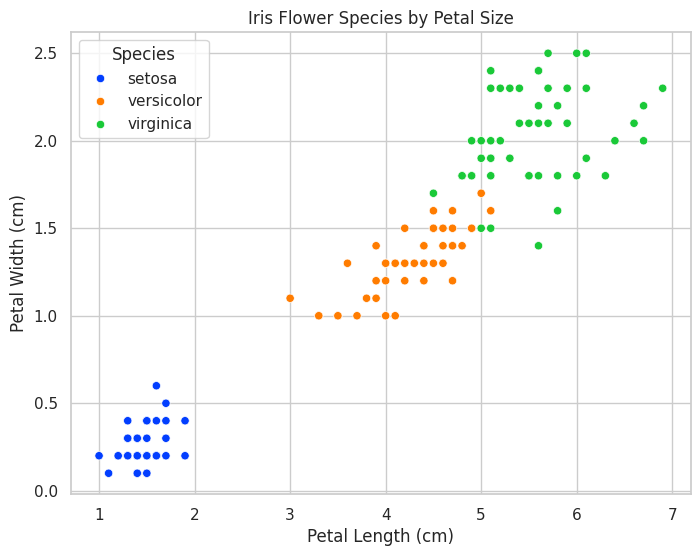

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="target_name",  # this colors by species
    palette="bright"
)

plt.title("Iris Flower Species by Petal Size")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()


In [8]:
pip install tensorflow

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# 🥬 Step 1: Features and labels
X = df.drop(columns=["target", "target_name"])
y = df["target"]

# 🧼 Step 2: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✂️ Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🏷 Step 4: Apply one-hot encoding on the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 🧩 Step 5: Build the model
model = Sequential()

# Add input layer (input_dim is the number of features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add one or more hidden layers (feel free to experiment with the number of units)
model.add(Dense(32, activation='relu'))

# Output layer (number of units equals the number of classes in y_train)
model.add(Dense(y_train.shape[1], activation='softmax'))  # 'softmax' for multi-class classification

# Compile the model (using 'categorical_crossentropy' for multi-class classification)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 🏋️‍♂️ Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.5533 - loss: 1.0164 - val_accuracy: 0.5667 - val_loss: 0.9643
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6935 - loss: 0.9241 - val_accuracy: 0.8667 - val_loss: 0.8880
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7365 - loss: 0.8768 - val_accuracy: 0.8667 - val_loss: 0.8145
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7475 - loss: 0.8155 - val_accuracy: 0.8333 - val_loss: 0.7471
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7704 - loss: 0.7543 - val_accuracy: 0.8000 - val_loss: 0.6853
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7915 - loss: 0.6852 - val_accuracy: 0.8000 - val_loss: 0.6287
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8233 - loss: 0.6091 - val_accuracy: 0.8333 - val_loss: 0.5783
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8402 - loss: 0.6077 - val_accuracy: 0.8667 - val_loss: 0.5340

In [11]:
# 🧪 Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8667 - loss: 0.4610
Test Loss: 0.4610
Test Accuracy: 0.8667


In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Turn one-hot back to label
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# Detailed report
print(classification_report(y_true, y_pred))

# Confusion matrix
print(confusion_matrix(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30

[[10  0  0]
 [ 0  5  4]
 [ 0  0 11]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


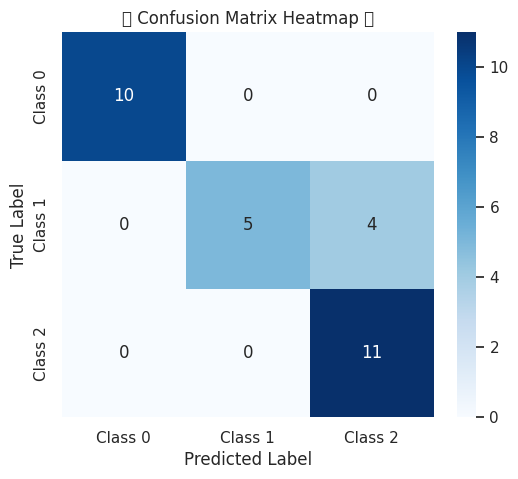

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ["Class 0", "Class 1", "Class 2"]

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 Confusion Matrix Heatmap 🔍')
plt.show()


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,  # give it room to grow
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7760 - loss: 0.5272 - val_accuracy: 0.8750 - val_loss: 0.4997
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8034 - loss: 0.4881 - val_accuracy: 0.8750 - val_loss: 0.4809
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8047 - loss: 0.4805 - val_accuracy: 0.8750 - val_loss: 0.4648
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7969 - loss: 0.4525 - val_accuracy: 0.8750 - val_loss: 0.4510
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8125 - loss: 0.4337 - val_accuracy: 0.8750 - val_loss: 0.4393
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8216 - loss: 0.4297 - val_accuracy: 0.9167 - val_loss: 0.4277
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8177 - loss: 0.4238 - val_accuracy: 0.9167 - val_loss: 0.4180
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8359 - loss: 0.3955 - val_accuracy: 0.9167 - val_

In [15]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



NOW FOR MNIST DATASET

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [17]:
# Load MNIST dataset
(X, y), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten the 28x28 images into 784 features for each image
X = X.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split training data further into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for MNIST
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val)
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7929 - loss: 0.6953 - val_accuracy: 0.9482 - val_loss: 0.1817
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9529 - loss: 0.1619 - val_accuracy: 0.9592 - val_loss: 0.1367
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9673 - loss: 0.1119 - val_accuracy: 0.9676 - val_loss: 0.1099
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9738 - loss: 0.0854 - val_accuracy: 0.9681 - val_loss: 0.1014
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9819 - loss: 0.0610 - val_accuracy: 0.9720 - val_loss: 0.0931
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9851 - loss: 0.0506 - val_accuracy: 0.9737 - val_loss: 0.0870
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9882 - loss: 0.0415 - val_accuracy: 0.9752 - val_loss: 0.0855
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9912 - loss: 0.0307 - val_accuracy: 0.

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.1112

Test Loss: 0.09526433795690536
Test Accuracy: 0.9739000201225281


In [22]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.94      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
 [[ 974    0    1    2    0    0    0    1    1    1]
 [   1 1122    3    2    0    1    2    1    3    0]
 [   9    3  989   11    1    0    1    7   11    